# Clothing image classification

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [35]:
from keras.datasets import fashion_mnist
from keras.models import Sequential, Model
from keras.layers import Flatten, Input, Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy

In [36]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

In [37]:
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

Посмотрим на train

In [38]:
print(X_train.shape)
print(y_train_labels.shape)

(60000, 28, 28)
(60000,)


In [39]:
y_train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Посмотрим на тестовую выборку

In [40]:
print(X_test.shape)
print(y_test_labels.shape)

(10000, 28, 28)
(10000,)


In [41]:
y_test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [42]:
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

In [43]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Подготовка данных

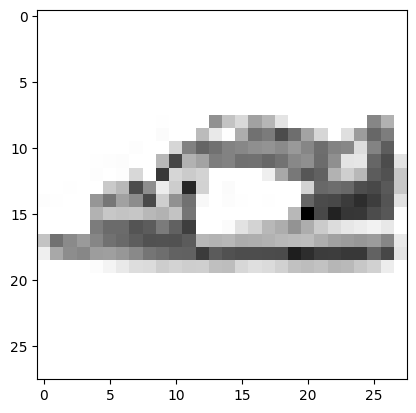

In [44]:
plt.figure()
plt.imshow(X_train[13], cmap=plt.cm.binary)
plt.show()

Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

In [45]:
X_train = X_train / 255.0
X_test = X_test / 255.0

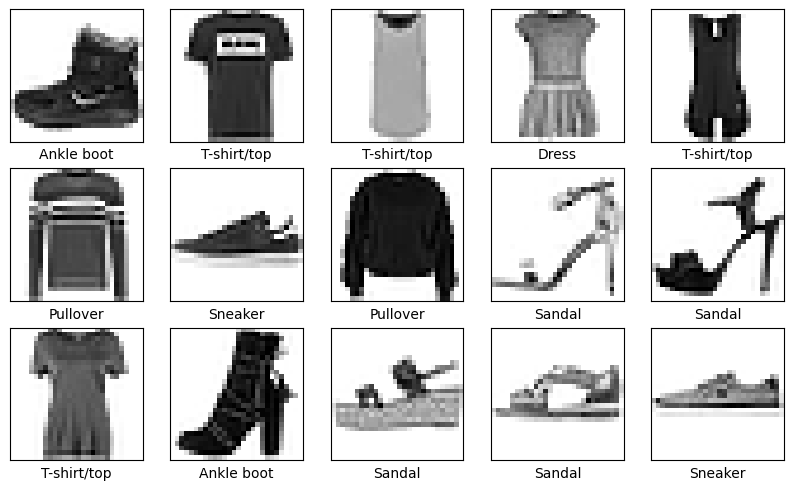

In [46]:
plt.figure(figsize=(10, 10))

for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_labels[i]])
plt.show()

# Построение модели

In [47]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(10)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [48]:
inputs = Input(shape=(28, 28))
x1 = Flatten()(inputs)
x2 = Dense(128, activation='tanh')(x1)
x3 = Dense(128, activation='tanh')(x2)
outputs = Dense(10)(x3)

x1, x2, x3, outputs

(<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'flatten_4')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_12')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_13')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_14')>)

In [49]:
model = Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
model.fit(X_train, y_train,
          epochs=10,
          batch_size=256,
          validation_data=(X_test, y_test))

Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 0.5517 - accuracy: 0.8056 - val_loss: 0.4396 - val_accuracy: 0.8423
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3906 - accuracy: 0.8594 - val_loss: 0.4050 - val_accuracy: 0.8541
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3526 - accuracy: 0.8733 - val_loss: 0.3994 - val_accuracy: 0.8583
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3347 - accuracy: 0.8793 - val_loss: 0.3773 - val_accuracy: 0.8618
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3159 - accuracy: 0.8840 - val_loss: 0.3552 - val_accuracy: 0.8740
Epoch 6/10
235/235 [==============================] - 2s 6ms/step - loss: 0.3009 - accuracy: 0.8896 - val_loss: 0.3630 - val_accuracy: 0.8703
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2873 - accuracy: 0.8936 - val_loss: 0.3395 - val_accuracy: 0.8804
Epoch 

In [52]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3356 - accuracy: 0.8814
Test accuracy 0.8813999891281128


In [53]:
model.predict(X_test[:1])

1/1 [==============================] - 0s 42ms/step


array([[-4.130503  , -6.336127  , -0.82381636, -1.4336635 , -0.9925636 ,
         4.498449  , -1.5609059 ,  4.656264  , -1.745944  ,  9.564337  ]],
      dtype=float32)

In [54]:
y_test[:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

# Посмотрим на предсказание сети

In [55]:
probability_model = Sequential([model,
                                tf.keras.layers.Softmax()
                                ])

In [56]:
predictions = probability_model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [57]:
predictions[0]

array([1.1129035e-06, 1.2262193e-07, 3.0376237e-05, 1.6507463e-05,
       2.5659447e-05, 6.2224865e-03, 1.4535146e-05, 7.2862175e-03,
       1.2079769e-05, 9.8639089e-01], dtype=float32)

In [58]:
np.argmax(predictions[0])

9

In [59]:
y_test_labels[0]

9

In [60]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Проверим предсказания модели

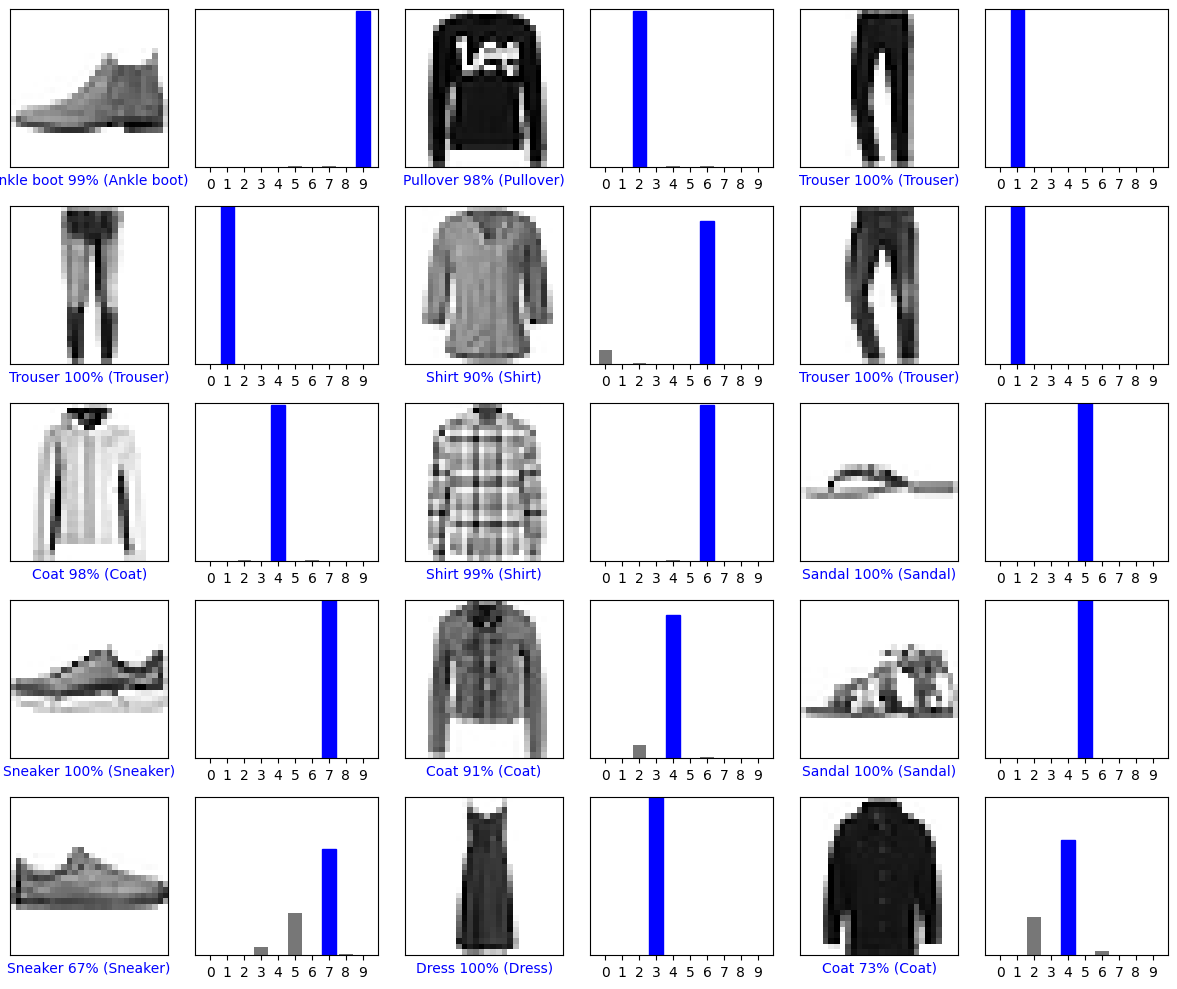

In [61]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, y_test_labels, X_test)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, y_test_labels)


plt.tight_layout()
plt.show()

# Вывод

 Два скрытых слоя по 128 нейронов в каждом и функция активации tanh сделали своё дело. Из оптимизаторов остановился на Adam